In [1]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

X, _ = make_blobs(n_samples=400, centers=[(-2,-2),(2,2)], cluster_std=[0.8,0.8], random_state=42)
outliers = np.random.uniform(low=-6, high=6, size=(20,2))
X_all = np.vstack([X, outliers])
X_all = StandardScaler().fit_transform(X_all)
y_true = np.array([1]*len(X) + [-1]*len(outliers))  # 1 normal, -1 anomaly


In [2]:
iforest = IsolationForest(contamination=len(outliers)/len(X_all), random_state=42).fit(X_all)
ocsvm  = OneClassSVM(kernel="rbf", gamma="scale", nu=len(outliers)/len(X_all)).fit(X_all)

pred_if = iforest.predict(X_all)
pred_oc = ocsvm.predict(X_all)

acc_if = (pred_if==y_true).mean()
acc_oc = (pred_oc==y_true).mean()
print("IForest acc:", acc_if, " | OCSVM acc:", acc_oc)


IForest acc: 0.9761904761904762  | OCSVM acc: 0.9642857142857143


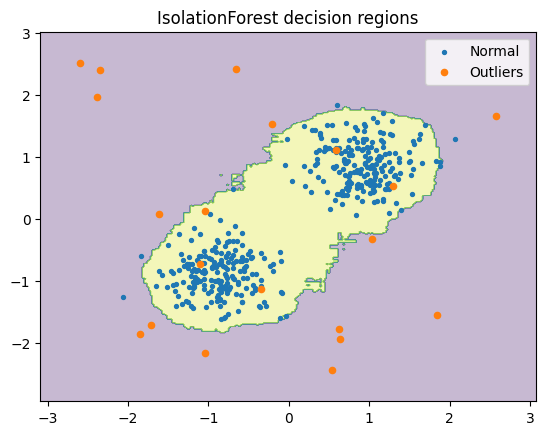

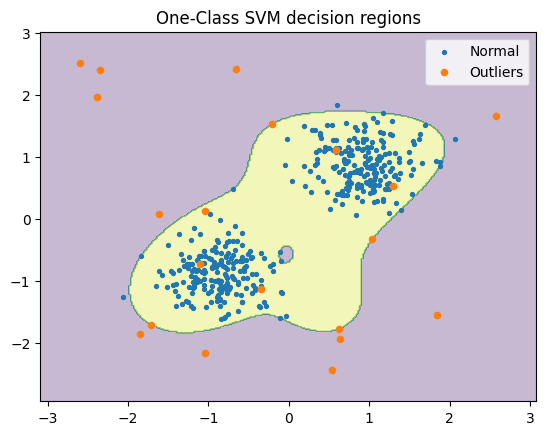

In [3]:
def plot_model(model, X, title):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,300), np.linspace(y_min,y_max,300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:-20,0], X[:-20,1], s=8, label="Normal")
    plt.scatter(X[-20:,0], X[-20:,1], s=20, label="Outliers")
    plt.legend(); plt.title(title); plt.show()

plot_model(iforest, X_all, "IsolationForest decision regions")
plot_model(ocsvm,  X_all, "One-Class SVM decision regions")
